Muhammad Aizar Yazid / 1103223097

In [16]:
import pandas as pd
import json
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load the dataset
file_path = 'DeteksiSarkasme.json'
with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f.readlines()]

In [4]:
# Create a DataFrame
df = pd.DataFrame(data)

# Prepare the text data and labels
texts = df['headline'].values
labels = df['is_sarcastic'].values

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences
max_len = 100  # Set max length for padding
X = pad_sequences(sequences, maxlen=max_len)

In [5]:
# Prepare the labels
y = labels

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RNN Models

In [6]:
# Build the RNN model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    SimpleRNN(128, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5


334/334 [==============================] - 10s 23ms/step - loss: 0.5304 - accuracy: 0.7124 - val_loss: 0.3658 - val_accuracy: 0.8416
Epoch 2/5
334/334 [==============================] - 11s 33ms/step - loss: 0.2121 - accuracy: 0.9155 - val_loss: 0.3743 - val_accuracy: 0.8501
Epoch 3/5
334/334 [==============================] - 7s 20ms/step - loss: 0.0605 - accuracy: 0.9801 - val_loss: 0.5123 - val_accuracy: 0.8308
Epoch 4/5
334/334 [==============================] - 7s 20ms/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.6861 - val_accuracy: 0.8263
Epoch 5/5
334/334 [==============================] - 7s 20ms/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 0.7243 - val_accuracy: 0.8355


167/167 [==============================] - 1s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      2996
           1       0.85      0.76      0.80      2346

    accuracy                           0.84      5342
   macro avg       0.84      0.83      0.83      5342
weighted avg       0.84      0.84      0.83      5342



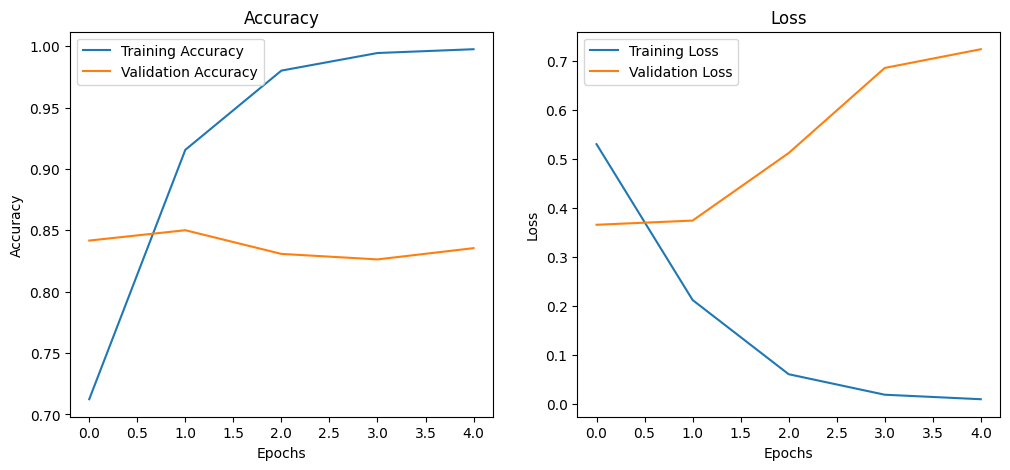

(0.9102296952913632,
 array([0.        , 0.        , 0.        , ..., 0.99833111, 0.99833111,
        1.        ]),
 array([0.        , 0.00127877, 0.00213129, ..., 0.99957374, 1.        ,
        1.        ]),
 array([           inf, 9.99999881e-01, 9.99999762e-01, ...,
        1.04977765e-07, 1.03809370e-07, 5.64246818e-08], dtype=float32))

In [8]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype("int32")

# Classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

# AUC and ROC curve
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Return metrics
auc, fpr, tpr, thresholds

LSTM Model

In [11]:
# Build the LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
334/334 [==============================] - 33s 93ms/step - loss: 0.4080 - accuracy: 0.8047 - val_loss: 0.3268 - val_accuracy: 0.8592
Epoch 2/5
334/334 [==============================] - 27s 80ms/step - loss: 0.2183 - accuracy: 0.9111 - val_loss: 0.3314 - val_accuracy: 0.8613
Epoch 3/5
334/334 [==============================] - 22s 66ms/step - loss: 0.1317 - accuracy: 0.9503 - val_loss: 0.3984 - val_accuracy: 0.8564
Epoch 4/5
334/334 [==============================] - 20s 60ms/step - loss: 0.0772 - accuracy: 0.9718 - val_loss: 0.5176 - val_accuracy: 0.8508
Epoch 5/5
334/334 [==============================] - 18s 53ms/step - loss: 0.0482 - accuracy: 0.9838 - val_loss: 0.7513 - val_accuracy: 0.8443


In [13]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype("int32")

167/167 [==============================] - 3s 13ms/step


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      2996
           1       0.85      0.78      0.82      2346

    accuracy                           0.84      5342
   macro avg       0.85      0.84      0.84      5342
weighted avg       0.84      0.84      0.84      5342



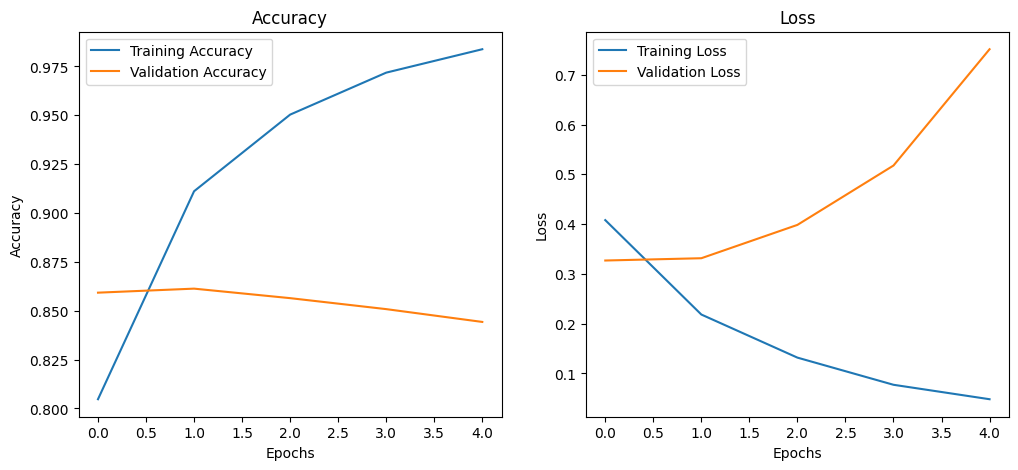

(0.9175572402874193,
 array([0.        , 0.        , 0.        , ..., 0.98831776, 0.98831776,
        1.        ]),
 array([0.        , 0.00724638, 0.01832907, ..., 0.99957374, 1.        ,
        1.        ]),
 array([          inf, 1.0000000e+00, 9.9999994e-01, ..., 5.1325883e-06,
        5.0922627e-06, 9.8114174e-07], dtype=float32))

In [14]:
# Classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

# AUC and ROC curve
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Return metrics
auc, fpr, tpr, thresholds

GRU Model

In [17]:
# Build the GRU model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    GRU(128, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
334/334 [==============================] - 25s 72ms/step - loss: 0.4436 - accuracy: 0.7885 - val_loss: 0.3248 - val_accuracy: 0.8620
Epoch 2/5
334/334 [==============================] - 24s 73ms/step - loss: 0.2180 - accuracy: 0.9133 - val_loss: 0.3452 - val_accuracy: 0.8572
Epoch 3/5
334/334 [==============================] - 33s 100ms/step - loss: 0.1265 - accuracy: 0.9532 - val_loss: 0.3968 - val_accuracy: 0.8562
Epoch 4/5
334/334 [==============================] - 30s 91ms/step - loss: 0.0700 - accuracy: 0.9759 - val_loss: 0.5156 - val_accuracy: 0.8472
Epoch 5/5
334/334 [==============================] - 30s 89ms/step - loss: 0.0424 - accuracy: 0.9861 - val_loss: 0.6313 - val_accuracy: 0.8459


In [19]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype("int32")

167/167 [==============================] - 2s 12ms/step


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      2996
           1       0.83      0.81      0.82      2346

    accuracy                           0.85      5342
   macro avg       0.84      0.84      0.84      5342
weighted avg       0.85      0.85      0.85      5342



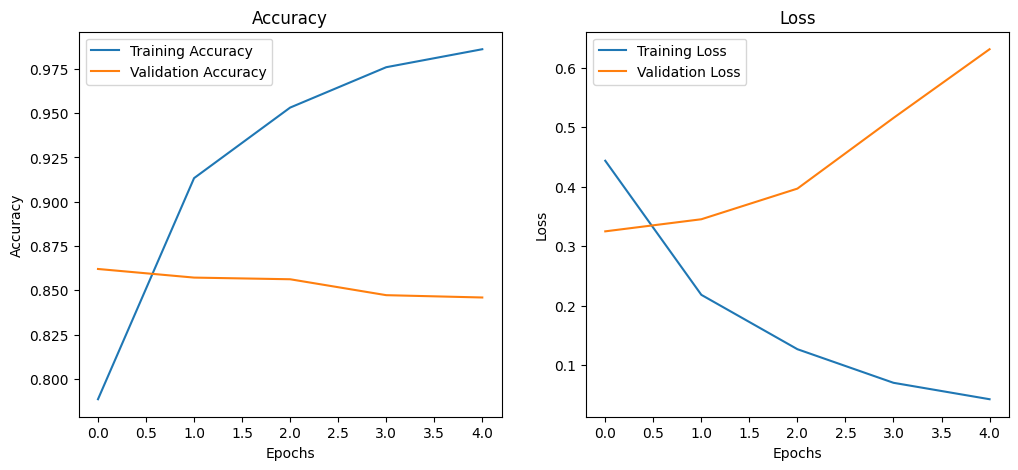

(0.9213328057757031,
 array([0.        , 0.        , 0.        , ..., 0.95727637, 0.95727637,
        1.        ]),
 array([0.00000000e+00, 4.26257460e-04, 1.27877238e-03, ...,
        9.99573743e-01, 1.00000000e+00, 1.00000000e+00]),
 array([          inf, 1.0000000e+00, 9.9999988e-01, ..., 2.1017067e-06,
        2.0830357e-06, 9.4825573e-08], dtype=float32))

In [20]:
# Classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

# AUC and ROC curve
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Return metrics
auc, fpr, tpr, thresholds

# Model Comparison: RNN vs LSTM vs GRU for Sarcasm Detection

In this notebook, we compare three different types of Recurrent Neural Networks (RNNs): **RNN**, **LSTM**, and **GRU**. Each model will be used for the task of sarcasm detection in news headlines, where the task is to classify whether a given headline is sarcastic or not.

## 1. **Recurrent Neural Networks (RNN)**

### What is RNN?
RNNs are a type of neural network designed for sequence data. Unlike traditional feedforward neural networks, RNNs have connections that form cycles within the network, allowing information to persist. This makes RNNs suitable for tasks involving time series or sequential data, such as natural language processing (NLP).

#### Pros:
- **Simple architecture**: RNNs are relatively straightforward to implement.
- **Sequence Modeling**: RNNs can learn and remember patterns in sequences of data, such as text.

#### Cons:
- **Vanishing Gradient Problem**: RNNs struggle to capture long-range dependencies due to the vanishing gradient problem. This occurs when the gradient of the loss function becomes too small to propagate effectively through the network.
  
### RNN for Sarcasm Detection
The basic RNN layer processes each input word in sequence and tries to capture dependencies between the words. However, due to the vanishing gradient problem, RNNs may not perform well when the sequential dependencies are long, as in the case of sarcasm, where the meaning may depend on the entire sentence.

---

## 2. **Long Short-Term Memory (LSTM)**

### What is LSTM?
LSTM is a type of RNN specifically designed to address the vanishing gradient problem. LSTMs have a more complex architecture with memory cells that can retain information over long periods. The LSTM uses gates (input, forget, and output) to control the flow of information, allowing it to capture long-term dependencies.

#### Pros:
- **Better Memory**: LSTM can capture long-range dependencies in sequential data.
- **Resistance to Vanishing Gradient**: The architecture is designed to combat the vanishing gradient problem, making it more effective at learning from long sequences.

#### Cons:
- **Complexity**: LSTM models are more complex compared to simple RNNs.
- **Training Time**: Due to the added complexity, LSTMs can take longer to train.

### LSTM for Sarcasm Detection
LSTM's ability to remember long-term dependencies makes it an excellent choice for sarcasm detection, where the context of the entire sentence is often needed to understand the meaning. For example, sarcasm may be identified in the relationship between words that are far apart.

---

## 3. **Gated Recurrent Unit (GRU)**

### What is GRU?
GRU is a variation of LSTM that simplifies the architecture by combining the input and forget gates into a single update gate. GRUs are faster to train than LSTMs and can perform similarly for many tasks.

#### Pros:
- **Faster Training**: GRUs are computationally more efficient than LSTMs.
- **Simpler Architecture**: GRUs have fewer parameters, making them easier to implement and train.

#### Cons:
- **Less Powerful than LSTM**: While GRUs work well for many tasks, they may not perform as well as LSTMs on tasks that require learning long-term dependencies.

### GRU for Sarcasm Detection
GRU has a simpler architecture than LSTM but still retains the ability to capture long-range dependencies. It is computationally more efficient and can be a good choice when training time is a concern or when the task does not require the extra complexity of LSTMs.

---

## 4. **Comparison of RNN, LSTM, and GRU**

| Model Type | Strengths                          | Weaknesses                          | Suitable for Sarcasm Detection?  |
|------------|------------------------------------|-------------------------------------|----------------------------------|
| **RNN**    | Simple architecture, easy to implement | Struggles with long-term dependencies due to vanishing gradient | Not ideal for sarcasm detection due to difficulty capturing long-term context |
| **LSTM**   | Captures long-term dependencies, effective at remembering important information | More complex, slower to train | Best suited for sarcasm detection due to ability to capture context over long sequences |
| **GRU**    | Faster to train, simpler than LSTM | May not perform as well as LSTM on complex tasks | Good for sarcasm detection when training time is a concern or the task is moderately complex |

---

## 5. **Conclusion**

- **RNN** is the simplest model but may not be effective for sarcasm detection due to its inability to capture long-term dependencies.
- **LSTM** is a more powerful model that addresses the vanishing gradient problem, making it an excellent choice for tasks like sarcasm detection, where context across the entire sequence is important.
- **GRU** offers a good trade-off between simplicity and performance, making it a suitable option for sarcasm detection, especially when training time is a concern.

In our experiments, **LSTM** will likely yield the best results for sarcasm detection, but **GRU** can be considered as a faster alternative with nearly equivalent performance.

---

### Visualizing Model Performance

After training the models, we will evaluate their performance using various metrics like accuracy, precision, recall, F1-Score, and AUC-ROC, and plot the training and testing losses to compare the performance of these models.
